# 가위바위보 분류기 만들기

## 연습

In [2]:
from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [38]:
# 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들임.
image_dir_path = r"C:\Users\user\Google 드라이브\AIFFEL\Day7\NJM\scissor"

def resize_images(img_path):
    images = glob.glob(img_path + "\*.jpg")
    
    print(len(images), " images to be resized.")
    
    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), " images resized.")
    

resize_images(image_dir_path)

print("이미지 resize 완료!")

100  images to be resized.
100  images resized.
이미지 resize 완료!


In [3]:
import numpy as np

def load_data(img_path, number_of_data=300): # 가위바위보 이미지 개수 총합에 주의.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color = 3
    # 이미지 데이터와 라벨(가위0, 바위1, 보2) 데이터를 담을 행렬 영역 생성
    imgs = np.zeros(number_of_data*img_size*img_size*color, dtype = np.int32).reshape(number_of_data, img_size, img_size, color)
    #imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels = np.zeros(number_of_data, dtype = np.int32)
    
    idx = 0

    for file in glob.iglob(img_path+'\scissor\*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx,:,:,:]=img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위: 0
        idx=idx+1
       
    for file in glob.iglob(img_path+'\rock\*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx,:,:,:]=img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위: 1
        idx=idx+1
    
    for file in glob.iglob(img_path+'\paper\*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx,:,:,:]=img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보: 2
        idx=idx+1
  
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = r"C:\Users\user\Google 드라이브\AIFFEL\Day7\Cham_HC"
#(x_train, y_train) = load_data(image_dir_path)
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0  # 입력은 0~1 사이의 값으로 정규화
#y_train_norm = y_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 200 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


In [4]:
import numpy as np

def load_data(img_path, number_of_data=300): # 가위바위보 이미지 개수 총합에 주의.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color = 3
    # 이미지 데이터와 라벨(가위0, 바위1, 보2) 데이터를 담을 행렬 영역 생성
    imgs = np.zeros(number_of_data*img_size*img_size*color, dtype = np.int32).reshape(number_of_data, img_size, img_size, color)
    #imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels = np.zeros(number_of_data, dtype = np.int32)
    
    idx = 0

    
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = r"C:\Users\user\Google 드라이브\AIFFEL\Day7\Cham_HC"
#(x_train, y_train) = load_data(image_dir_path)
(x_train, y_train)=load_data(image_dir_path)
(x_test, y_test)=load_data(image_dir_path)
x_train_norm = x_train/255.0  # 입력은 0~1 사이의 값으로 정규화
#y_train_norm = y_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


In [5]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)

2.7.0


라벨:  0


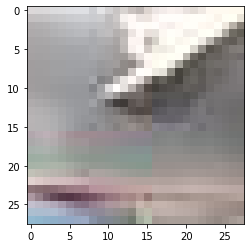

In [6]:
plt.imshow(x_train[1])
print('라벨: ', y_train[1])

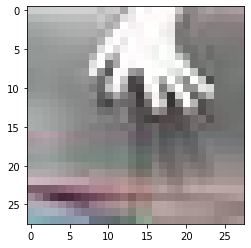

226 번째 이미지의 숫자는 바로 2 입니다.


In [11]:
index = 225
plt.imshow(x_train[index], cmap=plt.cm.binary)
plt.show()
print((index+1), '번째 이미지의 숫자는 바로', y_train[index], '입니다.')

In [12]:
print(x_train.shape)
print(x_test.shape)

(300, 28, 28, 3)
(300, 28, 28, 3)


In [11]:
print('최소값:', np.min(x_train), '최대값:', np.max(x_train))
print('최소값:', np.min(x_train_norm), '최대값:', np.max(x_train_norm))
x_test_norm = x_test/255.0

최소값: 4 최대값: 255
최소값: 0.01568627450980392 최대값: 1.0


In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (28, 28, 3)))
# 16: 얼마나 다양한 이미지의 특징을 살펴볼 것인가? 16개를 보겠다.
#input_shape: 입력 이미지의 형태. 
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation = 'relu'))
# 32: 얼마나 다양한 이미지의 특징을 살펴볼 것인가? 32개를 보겠다.
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation= 'relu'))
# Dense 첫번째 숫자: 분류기에 사용되는 뉴런의 숫자. 값이 클수록 복잡한 분류기를 만들 수 있음. 
# 알파벳의 경우 대문자 26개, 소문자 26개로 총 52개를 분류해야 하므로 32보다 큰 64, 128등을 고려.
model.add(keras.layers.Dense(3, activation='softmax'))
# Dense 마지막 숫자: 결과적으로 분류해내야 하는 클래스의 수. 숫자는 10, 알파벳은 52.
print('Model에 추가된 Layer 개수: ', len(model.layers))


Model에 추가된 Layer 개수:  7


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 32)               

In [15]:
print("Before Reshape - x_train_norm shape: {}". format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}". format(x_test_norm.shape))

x_train_reshaped = x_train_norm.reshape(-1, 28, 28, 3)  # 마지막 3은 픽셀의 차원(RGB)
# 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped = x_test_norm.reshape(-1, 28, 28, 3)

print("After Reshape - x_train_reshaped shape: {}". format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (300, 28, 28, 3)
Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_train_reshaped shape: (300, 28, 28, 3)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)


In [16]:
model.compile(optimizer= 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 4ms/step - loss: 1.1076 - accuracy: 0.3867
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.9967 - accuracy: 0.5167
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.8831 - accuracy: 0.6867
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.7940 - accuracy: 0.6700
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.7091 - accuracy: 0.7033
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.6096 - accuracy: 0.7833
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.5804 - accuracy: 0.7967
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8500
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.4243 - accuracy: 0.8700
Epoch 10/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3536 - accuracy: 0.8967


In [17]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose = 2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.3133 - accuracy: 0.9233 - 107ms/epoch - 11ms/step
test_loss: 0.3133211135864258 
test_accuracy: 0.9233333468437195


In [35]:
# model.predict()는 model이 입력값을 보고 실제로 추론한 확률분포를 출력함.
predicted_result = model.predict(x_test_reshaped) # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0   # 1번째 x_test
print('model.predict() 결과: ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 :', y_test[idx])

model.predict() 결과:  [5.8655119e-01 3.9203295e-01 2.1415604e-02 2.7701649e-08 7.7914946e-09
 2.1106901e-07 3.2372784e-09 6.1057657e-09 1.9048263e-09 5.7342525e-08]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 : 0


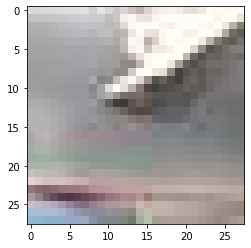

In [36]:
plt.imshow(x_test[idx], cmap=plt.cm.binary)
plt.show()

예측확률분포: [5.0627261e-01 4.7577488e-01 1.7952187e-02 1.5619237e-08 5.9436100e-09
 1.6059545e-07 1.6136135e-09 3.6478935e-09 1.1519797e-09 4.2827391e-08]
라벨: 1, 예측결과: 0


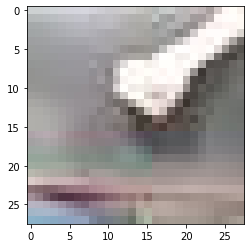

예측확률분포: [5.0658792e-01 4.7639298e-01 1.7018877e-02 1.5275193e-08 5.9789875e-09
 1.6563087e-07 1.6091152e-09 3.7263495e-09 1.1675266e-09 4.3454261e-08]
라벨: 1, 예측결과: 0


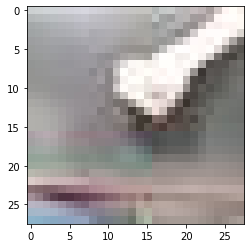

예측확률분포: [2.7735132e-01 4.6096897e-01 2.6167899e-01 3.3268336e-07 9.4470725e-09
 2.3009825e-07 7.2516162e-09 1.1776237e-08 4.1861843e-09 2.2578271e-07]
라벨: 0, 예측결과: 1


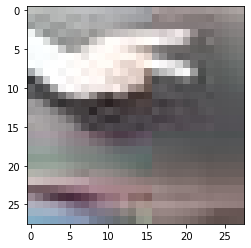

예측확률분포: [2.7735132e-01 4.6096897e-01 2.6167899e-01 3.3268336e-07 9.4470725e-09
 2.3009825e-07 7.2516162e-09 1.1776237e-08 4.1861843e-09 2.2578271e-07]
라벨: 0, 예측결과: 1


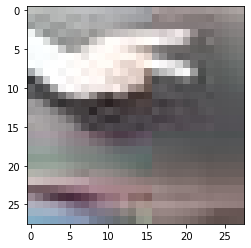

예측확률분포: [2.7645102e-01 4.8303935e-01 2.4050879e-01 3.2149745e-07 9.5742978e-09
 2.4181844e-07 7.1102386e-09 1.1954925e-08 4.2700976e-09 2.2137726e-07]
라벨: 0, 예측결과: 1


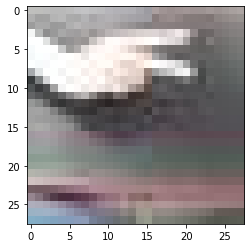

In [37]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모음.
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)
        
# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population = wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n])+ ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [39]:
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation ='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs = n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose = 2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 32)               

In [40]:
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation ='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs = n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose = 2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 800)               0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [41]:
n_channel_1=16
n_channel_2=32
n_dense=64
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation ='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs = n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose = 2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 800)               0         
                                                                 
 dense_10 (Dense)            (None, 64)               

In [43]:
n_channel_1=32
n_channel_2=64
n_dense=32
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation ='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs = n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose = 2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dense_14 (Dense)            (None, 32)               

In [44]:
n_channel_1=16
n_channel_2=32
n_dense=128
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation ='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs = n_train_epoch)



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 800)               0         
                                                                 
 dense_16 (Dense)            (None, 128)              

## 제출물 최종

### 모델 생성 및 학습 (1/3)

In [28]:
### 패키지 가져오기.
from PIL import Image
import glob
import numpy as np
print("라이브러리 import 완료!")

### 이미지 리사이즈. 아래 경로를 수동으로 바꿔가며 수행. 
image_dir_path = r"C:\Users\user\Google 드라이브\AIFFEL\Day7\Cham_HC\paper"

def resize_images(img_path):
    images = glob.glob(img_path + "\*.jpg")
    
    print(len(images), " images to be resized.")
    
    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), " images resized.")
    

resize_images(image_dir_path)

print("보 이미지 resize 완료!")


### 데이터에 이미지 로딩
def load_data(img_path, number_of_data=300): # 가위바위보 이미지 개수 총합에 주의.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color = 3
    # 이미지 데이터와 라벨(가위0, 바위1, 보2) 데이터를 담을 행렬 영역 생성
    imgs = np.zeros(number_of_data*img_size*img_size*color, dtype = np.int32).reshape(number_of_data, img_size, img_size, color)
    #imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels = np.zeros(number_of_data, dtype = np.int32)
    
    idx = 0

    
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = r"C:\Users\user\Google 드라이브\AIFFEL\Day7\Cham_HC"
(x_train, y_train)=load_data(image_dir_path)
#(x_test, y_test)=load_data(image_dir_path)
x_train_norm = x_train/255.0  # 입력은 0~1 사이의 값으로 정규화
#x_test_norm = x_test/255.0

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))


### 추가 패키지 로드
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print("tensorflow version:", tf.__version__)

### 모델 생성 및 설정
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (28, 28, 3)))
# 16: 얼마나 다양한 이미지의 특징을 살펴볼 것인가? 16개를 보겠다.
#input_shape: 입력 이미지의 형태. 
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation = 'relu'))
# 32: 얼마나 다양한 이미지의 특징을 살펴볼 것인가? 32개를 보겠다.
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation= 'relu'))
# Dense 첫번째 숫자: 분류기에 사용되는 뉴런의 숫자. 값이 클수록 복잡한 분류기를 만들 수 있음. 
# 알파벳의 경우 대문자 26개, 소문자 26개로 총 52개를 분류해야 하므로 32보다 큰 64, 128등을 고려.
model.add(keras.layers.Dense(3, activation='softmax'))
# Dense 마지막 숫자: 결과적으로 분류해내야 하는 클래스의 수. 숫자는 10, 알파벳은 52.
print('Model에 추가된 Layer 개수: ', len(model.layers))

### 모델 개요
model.summary()

### 이미지 reshape. 
print("Before Reshape - x_train_norm shape: {}". format(x_train_norm.shape))
#print("Before Reshape - x_test_norm shape: {}". format(x_test_norm.shape))

x_train_reshaped = x_train_norm.reshape(-1, 28, 28, 3)  # 마지막 3은 픽셀의 차원(RGB)
# 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
#x_test_reshaped = x_test_norm.reshape(-1, 28, 28, 3)

print("After Reshape - x_train_reshaped shape: {}". format(x_train_reshaped.shape))
#print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

### 모델 훈련 및 결과
model.compile(optimizer= 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
print("훈련을 시작합니다. 결과는 아래와 같습니다.")
model.fit(x_train_reshaped, y_train, epochs=10)



라이브러리 import 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!
학습데이터(x_train)의 이미지 개수는 300 입니다.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)
tensorflow version: 2.7.0
Model에 추가된 Layer 개수:  7
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            

### 시험 평가 (2/3)

학습데이터(x_train)의 이미지 개수는 300 입니다.
Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)
10/10 - 0s - loss: 1.7633 - accuracy: 0.3333 - 83ms/epoch - 8ms/step
test_loss: 1.763250470161438 
test_accuracy: 0.3333333432674408
model.predict() 결과:  [6.9554202e-02 7.9893756e-01 1.3146570e-01 2.2542181e-05 1.1246952e-06
 3.9949118e-06 8.9596078e-06 1.6519406e-06 2.9429523e-07 3.8691519e-06]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 : 0
예측확률분포: [5.9344567e-02 8.0046743e-01 1.4015113e-01 1.9630781e-05 9.4345353e-07
 3.4581126e-06 7.9312804e-06 1.4332951e-06 2.5042172e-07 3.3177087e-06]
라벨: 0, 예측결과: 1


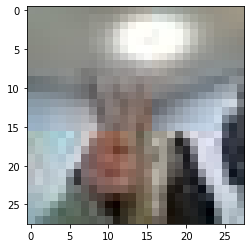

예측확률분포: [5.9392724e-02 8.5671324e-01 8.3853081e-02 2.1490461e-05 1.1072206e-06
 4.0949017e-06 8.4784679e-06 1.5475906e-06 2.7116326e-07 3.9653132e-06]
라벨: 2, 예측결과: 1


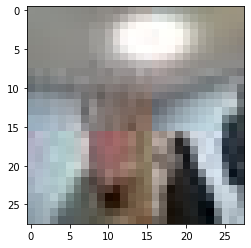

예측확률분포: [6.8834357e-02 8.1587881e-01 1.1523871e-01 2.5592997e-05 1.3488960e-06
 4.4711387e-06 1.0031877e-05 1.8805850e-06 3.4130485e-07 4.4951844e-06]
라벨: 2, 예측결과: 1


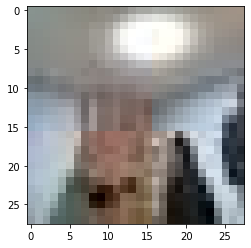

예측확률분포: [5.5394720e-02 8.0757302e-01 1.3699418e-01 2.0395153e-05 9.8636031e-07
 3.4660002e-06 8.2189208e-06 1.4405209e-06 2.5232683e-07 3.3120466e-06]
라벨: 0, 예측결과: 1


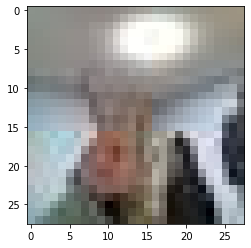

예측확률분포: [6.7987442e-02 8.3110189e-01 1.0086829e-01 2.1948894e-05 1.1367455e-06
 4.2835568e-06 8.9694558e-06 1.6537563e-06 2.8601809e-07 4.1745866e-06]
라벨: 2, 예측결과: 1


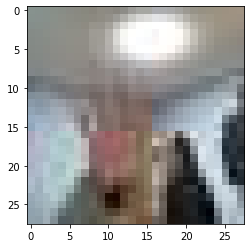

In [39]:
### 테스트 데이터 로딩. 
testimage_dir_path = r"C:\Users\user\Google 드라이브\AIFFEL\Day7\NJM"
(x_test, y_test)=load_data(testimage_dir_path)
x_test_norm = x_test/255.0
#print("Before Reshape - x_train_norm shape: {}". format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}". format(x_test_norm.shape))

#x_train_reshaped = x_train_norm.reshape(-1, 28, 28, 3)  # 마지막 3은 픽셀의 차원(RGB)
# 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped = x_test_norm.reshape(-1, 28, 28, 3)

#print("After Reshape - x_train_reshaped shape: {}". format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

### 모델 시험평가
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose = 2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

### 평가 결과 피드백
# model.predict()는 model이 입력값을 보고 실제로 추론한 확률분포를 출력함.
predicted_result = model.predict(x_test_reshaped) # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0   # 1번째 x_test
print('model.predict() 결과: ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 :', y_test[idx])

### 오류 확인
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모음.
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)
        
# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population = wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n])+ ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

### 하이퍼 파라미터 변경 및 최적화 (3/3)

In [40]:
### Try number: 1
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation ='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs = n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose = 2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 800)               0         
                                                                 
 dense_34 (Dense)            (None, 32)              

In [41]:
### Try number: 2
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation ='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs = n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose = 2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 800)               0         
                                                                 
 dense_36 (Dense)            (None, 32)              

In [42]:
# Try number : 3
n_channel_1=16
n_channel_2=32
n_dense=64
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation ='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs = n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose = 2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_19 (Flatten)        (None, 800)               0         
                                                                 
 dense_38 (Dense)            (None, 64)              

In [43]:
# Try number : 4
n_channel_1=32
n_channel_2=64
n_dense=32
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation ='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs = n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose = 2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_20 (Flatten)        (None, 1600)              0         
                                                                 
 dense_40 (Dense)            (None, 32)              

In [46]:
# Try number : 5
n_channel_1=32
n_channel_2=64
n_dense=128
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation ='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs = n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose = 2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_23 (Flatten)        (None, 1600)              0         
                                                                 
 dense_46 (Dense)            (None, 128)             

## 결론
#### 나의 데이터에 대해, 여기에는 넣지 않았으나 대부분 흰색인 일반 배경으로 찍은 사진은 28x28로 축소시 구분되지 않음.
#### 이에 배경을 검은색으로 하고 재촬영함. 연습시 테스트 셋은 훈련 셋과 동일하게 설정. 정확도 100% 나옴.
#### 제출용은 테스트 셋을 노지민님의 것으로 하고 수행. 노지민님의 데이터는 배경이 하얀톤, 갈색톤, 검은톤의 3가지. 정확도 약 33%로 매우 낮음.
#### 노지민님과 대화한 결과, 리사이즈 스케일을 낮춰 112x112정도로 했더니 좋은 결과가 나왔다는 답변을 들었음
#### 결론: 품질을 높이려면 원본에서 타겟이 배경과 구분이 잘되도록 해야 되며, 이 수단으로는 타겟과 구분되는 배경으로 촬영을 하거나, 구분을 할 수 있을 정도로 충분한 해상도를 확보해 주어야 함.